In [1]:
# YOLOv8 Training with COCO8 Dataset
# Save this as: notebooks/yolo_training.ipynb

import os
from pathlib import Path
import yaml
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np



🚀 Setting up YOLOv8 training environment...
📁 Project root: /Users/Kota/blended/Team3AmazonProject
📁 Dataset path: /Users/Kota/blended/Team3AmazonProject/datasets/coco8

📋 Creating dataset configuration...
🔍 Inspecting actual class IDs in labels...
Found class IDs: [22, 23, 45, 49, 50, 58, 75]
📋 Classes in this dataset:
   22: zebra
   23: giraffe
   45: bowl
   49: orange
   50: broccoli
   58: potted plant
   75: vase
✅ Dataset config saved: /Users/Kota/blended/Team3AmazonProject/data/coco8.yaml

🔍 Inspecting dataset...
📊 Dataset Statistics:
   Train images: 4
   Train labels: 4
   Val images: 4
   Val labels: 4

🖼️ Visualizing sample: 000000000009.jpg


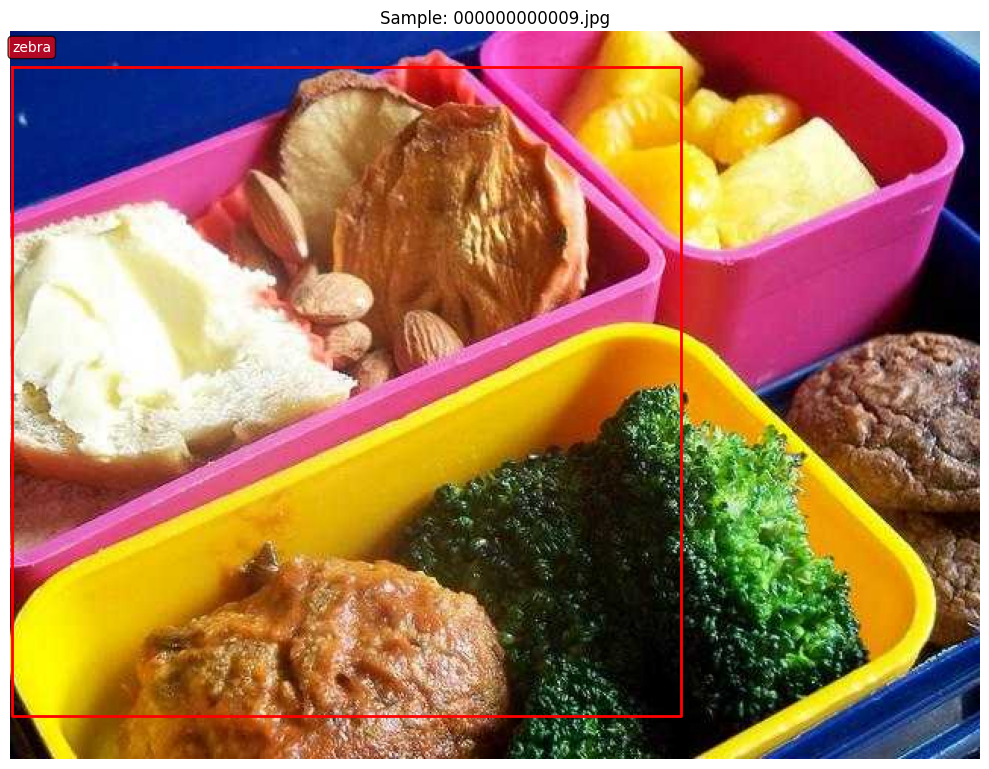


🏋️ Starting YOLOv8 training...


100%|██████████| 6.25M/6.25M [00:01<00:00, 6.54MB/s]


📋 Training parameters:
   data: /Users/Kota/blended/Team3AmazonProject/data/coco8.yaml
   epochs: 50
   imgsz: 640
   batch: 16
   lr0: 0.01
   save: True
   verbose: True
   project: /Users/Kota/blended/Team3AmazonProject/results
   name: coco8_training
   exist_ok: True

🚀 Training started... This may take a while!
Ultralytics 8.3.170 🚀 Python-3.13.5 torch-2.7.1 CPU (Apple M4)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/Kota/blended/Team3AmazonProject/data/coco8.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fals

In [4]:
# ===== 1. Setup and Configuration =====
print("🚀 Setting up YOLOv8 training environment...")

# Project paths
PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
DATASET_PATH = PROJECT_ROOT / "datasets" / "coco8"
MODELS_PATH = PROJECT_ROOT / "models"
RESULTS_PATH = PROJECT_ROOT / "results"

# Create directories
MODELS_PATH.mkdir(exist_ok=True)
RESULTS_PATH.mkdir(exist_ok=True)

print(f"📁 Project root: {PROJECT_ROOT}")
print(f"📁 Dataset path: {DATASET_PATH}")

# ===== 2. Dataset Configuration =====
print("\n📋 Creating dataset configuration...")

# First, let's inspect the actual class IDs in the labels
print("🔍 Inspecting actual class IDs in labels...")
class_ids = set()
sample_labels = list((DATASET_PATH / "labels" / "train").glob("*.txt"))

for label_file in sample_labels[:5]:  # Check first 5 files
    with open(label_file, 'r') as f:
        lines = f.read().strip().split('\n')
        for line in lines:
            if line:
                class_id = int(line.split()[0])
                class_ids.add(class_id)

print(f"Found class IDs: {sorted(class_ids)}")

# COCO full class names (coco8 uses original COCO class IDs)
coco_class_names = {
    0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus',
    6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant',
    11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat',
    16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear',
    22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag',
    27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard',
    32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove',
    36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle',
    40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon',
    45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange',
    50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut',
    55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed',
    60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse',
    65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave',
    69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book',
    74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier',
    79: 'toothbrush'
}

# Create dataset config with only the classes present in the dataset
dataset_config = {
    'path': str(DATASET_PATH),
    'train': 'images/train',
    'val': 'images/val',
    'names': {class_id: coco_class_names[class_id] for class_id in sorted(class_ids)}
}

print(f"📋 Classes in this dataset:")
for class_id, name in dataset_config['names'].items():
    print(f"   {class_id}: {name}")

config_path = PROJECT_ROOT / "data" / "coco8.yaml"
config_path.parent.mkdir(exist_ok=True)

with open(config_path, 'w') as f:
    yaml.dump(dataset_config, f, default_flow_style=False)

print(f"✅ Dataset config saved: {config_path}")

# ===== 3. Dataset Inspection =====
print("\n🔍 Inspecting dataset...")

# Count images and labels
train_images = list((DATASET_PATH / "images" / "train").glob("*.jpg"))
val_images = list((DATASET_PATH / "images" / "val").glob("*.jpg"))
train_labels = list((DATASET_PATH / "labels" / "train").glob("*.txt"))
val_labels = list((DATASET_PATH / "labels" / "val").glob("*.txt"))

print(f"📊 Dataset Statistics:")
print(f"   Train images: {len(train_images)}")
print(f"   Train labels: {len(train_labels)}")
print(f"   Val images: {len(val_images)}")
print(f"   Val labels: {len(val_labels)}")

# Visualize a sample image with annotations
def visualize_sample(image_path, label_path):
    """Visualize an image with its YOLO format annotations"""
    
    # Load image
    image = Image.open(image_path)
    img_width, img_height = image.size
    
    # Load labels
    with open(label_path, 'r') as f:
        labels = f.read().strip().split('\n')
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    
    # Draw bounding boxes
    for label in labels:
        if label:
            parts = label.split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])
            
            # Convert YOLO format to pixel coordinates
            x_center *= img_width
            y_center *= img_height
            width *= img_width
            height *= img_height
            
            # Calculate corner coordinates
            x1 = x_center - width/2
            y1 = y_center - height/2
            x2 = x_center + width/2
            y2 = y_center + height/2
            
            # Draw rectangle
            plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], 'r-', linewidth=2)
            
            # Get class name safely
            class_name = dataset_config['names'].get(class_id, f'Unknown_{class_id}')
            plt.text(x1, y1-10, class_name, 
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="red", alpha=0.7),
                    color='white', fontsize=10)
    
    plt.title(f"Sample: {image_path.name}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show a sample
if train_images and train_labels:
    sample_img = train_images[0]
    sample_label = train_labels[0]
    print(f"\n🖼️ Visualizing sample: {sample_img.name}")
    visualize_sample(sample_img, sample_label)

# ===== 4. Model Training =====
print("\n🏋️ Starting YOLOv8 training...")

# Initialize YOLOv8 model
model = YOLO('yolov8n.pt')  # Start with nano version for quick training

# Training parameters
train_params = {
    'data': str(config_path),
    'epochs': 50,
    'imgsz': 640,
    'batch': 16,
    'lr0': 0.01,
    'save': True,
    'verbose': True,
    'project': str(RESULTS_PATH),
    'name': 'coco8_training',
    'exist_ok': True
}

print("📋 Training parameters:")
for key, value in train_params.items():
    print(f"   {key}: {value}")

# Start training
print("\n🚀 Training started... This may take a while!")
try:
    results = model.train(**train_params)
    print("✅ Training completed successfully!")
except Exception as e:
    print(f"❌ Training failed: {e}")

# ===== 5. Model Evaluation =====
print("\n📊 Evaluating trained model...")

# Load the best trained model
best_model_path = RESULTS_PATH / "coco8_training" / "weights" / "best.pt"
if best_model_path.exists():
    trained_model = YOLO(str(best_model_path))
    
    # Validate the model
    validation_results = trained_model.val(data=str(config_path))
    
    print("📈 Validation Results:")
    print(f"   mAP50: {validation_results.box.map50:.4f}")
    print(f"   mAP50-95: {validation_results.box.map:.4f}")
    
    # ===== 6. Test Inference =====
    print("\n🔮 Testing inference on validation images...")
    
    # Run inference on a few validation images
    val_sample = val_images[:2]  # Test on first 2 validation images
    
    for img_path in val_sample:
        print(f"\n🖼️ Processing: {img_path.name}")
        
        # Run inference
        results = trained_model(str(img_path))
        
        # Display results
        for result in results:
            # Plot results
            result_img = result.plot()
            
            plt.figure(figsize=(12, 8))
            plt.imshow(result_img)
            plt.title(f"Detection Results: {img_path.name}")
            plt.axis('off')
            plt.show()
            
            # Print detection info
            if result.boxes is not None:
                print(f"   Detected {len(result.boxes)} objects")
                for box in result.boxes:
                    class_id = int(box.cls[0])
                    confidence = float(box.conf[0])
                    class_name = dataset_config['names'].get(class_id, f'Unknown_{class_id}')
                    print(f"   - {class_name}: {confidence:.3f}")
            else:
                print("   No objects detected")

else:
    print("❌ Best model not found. Training might have failed.")

# ===== 7. Export Model (Optional) =====
print("\n📦 Exporting model for deployment...")

if best_model_path.exists():
    try:
        # Export to ONNX format for deployment
        export_path = trained_model.export(format='onnx')
        print(f"✅ Model exported to: {export_path}")
    except Exception as e:
        print(f"❌ Export failed: {e}")

print("\n🎉 Training notebook completed!")
print(f"📁 Check results in: {RESULTS_PATH}")
print("📝 Next steps:")
print("   1. Analyze training curves")
print("   2. Collect more indoor-specific data")
print("   3. Fine-tune for your specific use case")